# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from api_keys import weather_api_key

from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
lat_lngs = []

cities = []

lat_range = (-90, 90)
lng_range = (-180, 180)

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

In [4]:
url = 'http://api.openweathermap.org/data/2.5/weather'

city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1
for i, city in enumerate(cities):
   
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    record_count += 1

    try:
        response = requests.get(city_url).json()
        
        city_weather = response

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kabwe
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | atafu village
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | encruzilhada do sul
Processing Record 9 of Set 1 | walvis bay
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | codrington
Processing Record 12 of Set 1 | canutama
Processing Record 13 of Set 1 | shalqar
Processing Record 14 of Set 1 | nanping
Processing Record 15 of Set 1 | ceeldheer
Processing Record 16 of Set 1 | barcelos
Processing Record 17 of Set 1 | burang
Processing Record 18 of Set 1 | keflavik
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | kaedi
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | pokhara
Processing Record 23 of Se

In [5]:
city_data_df = pd.DataFrame(city_data)

city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [6]:
city_data_df["Max Temp"] = (city_data_df["Max Temp"] - 273.15) * 9/5 + 32
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kabwe,-14.4469,28.4464,59.666,67,16,2.42,ZM,1716672681
1,albany,42.6001,-73.9662,80.222,50,100,0.34,US,1716672460
2,blackmans bay,-43.0167,147.3167,37.526,95,33,2.04,AU,1716672681
3,kodiak,57.7900,-152.4072,45.914,71,100,6.17,US,1716672681
4,atafu village,-8.5421,-172.5159,85.496,76,48,6.37,TK,1716672682


In [7]:
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kabwe,-14.4469,28.4464,59.666,67,16,2.42,ZM,1716672681
1,albany,42.6001,-73.9662,80.222,50,100,0.34,US,1716672460
2,blackmans bay,-43.0167,147.3167,37.526,95,33,2.04,AU,1716672681
3,kodiak,57.7900,-152.4072,45.914,71,100,6.17,US,1716672681
4,atafu village,-8.5421,-172.5159,85.496,76,48,6.37,TK,1716672682


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

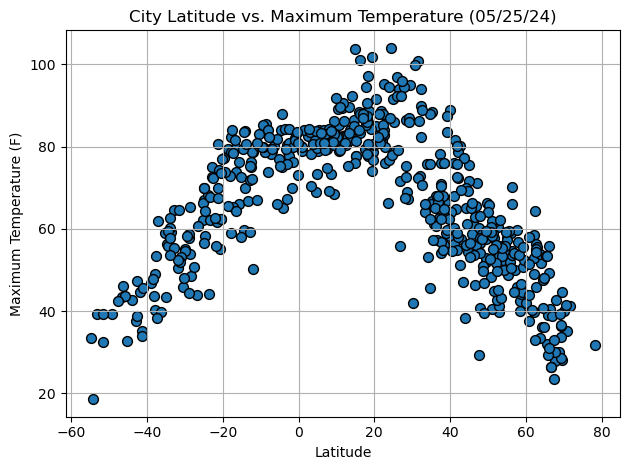

In [9]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],  edgecolors="black", s=50, marker="o")

plt.title("City Latitude vs. Maximum Temperature (" + time.strftime("%x") + ")")
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.tight_layout()

plt.savefig("../output_data/Fig1.png")

plt.show()

#### Latitude Vs. Humidity

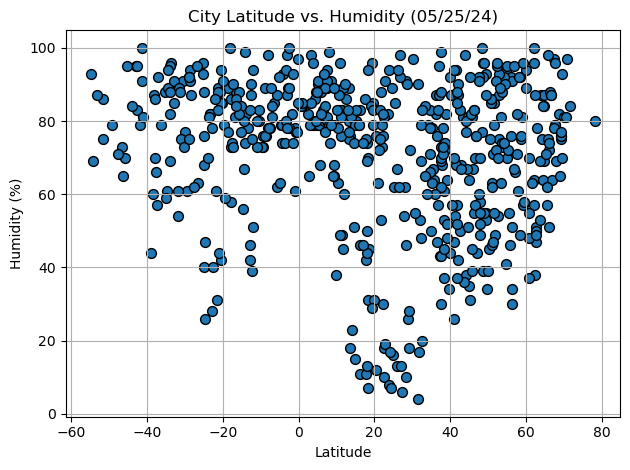

In [10]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", s=50)

plt.title("City Latitude vs. Humidity (" + time.strftime("%x") + ")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.tight_layout()

plt.savefig("../output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness

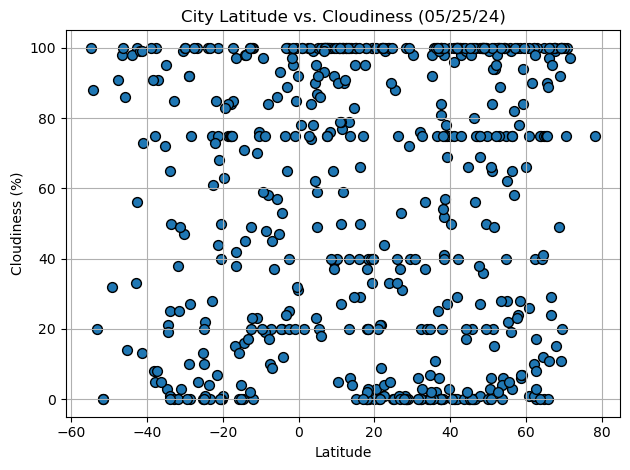

In [11]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", s=50)

plt.title("City Latitude vs. Cloudiness (" + time.strftime("%x") + ")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.tight_layout()

plt.savefig("../output_data/Fig3.png")

plt.show()

#### Latitude vs. Wind Speed Plot

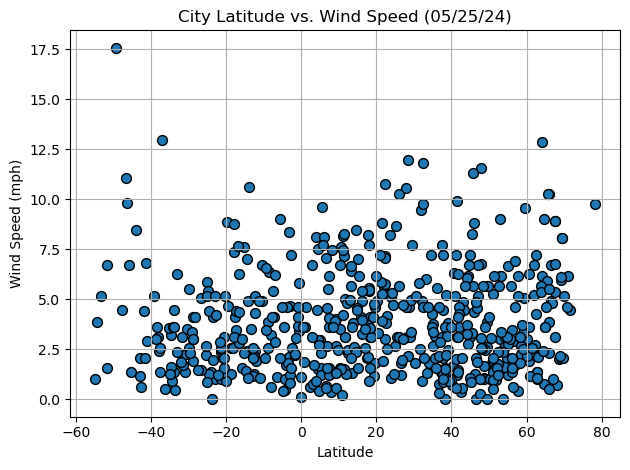

In [12]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", s=50)

plt.title("City Latitude vs. Wind Speed (" + time.strftime("%x") + ")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.tight_layout()

plt.savefig("../output_data/Fig4.png")

plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
def create_linear_regression_plot(x_values, y_values, title, y_label, equation_position, r_position):
     # Create a scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", s=50)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_line = [slope * x + intercept for x in x_values]

    plt.plot(x_values, regression_line, 'r')

    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.grid(True)
    plt.tight_layout()

    plt.annotate(f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}",
                 xy=(x_values.min(), y_values.max()), xytext=equation_position,
                 textcoords="offset points", fontsize=16)
    plt.annotate(f"r-value = {str(round(rvalue, 2))}",
                 xy=(x_values.min(), y_values.max() - 10), xytext=r_position,
                 textcoords="offset points", fontsize=16)

    plt.show()

In [14]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,80.222,50,100,0.34,US,1716672460
3,kodiak,57.7900,-152.4072,45.914,71,100,6.17,US,1716672681
6,bethel,41.3712,-73.4140,81.644,54,0,3.09,US,1716672411
12,shalqar,47.8333,59.6000,56.462,58,27,6.78,KZ,1716672683
13,nanping,26.6450,118.1736,71.618,98,37,1.19,CN,1716672683


In [15]:
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kabwe,-14.4469,28.4464,59.666,67,16,2.42,ZM,1716672681
2,blackmans bay,-43.0167,147.3167,37.526,95,33,2.04,AU,1716672681
4,atafu village,-8.5421,-172.5159,85.496,76,48,6.37,TK,1716672682
5,port-aux-francais,-49.3500,70.2167,39.326,79,32,17.58,TF,1716672682
7,encruzilhada do sul,-30.5439,-52.5219,45.986,91,99,2.24,BR,1716672682


###  Temperature vs. Latitude Linear Regression Plot

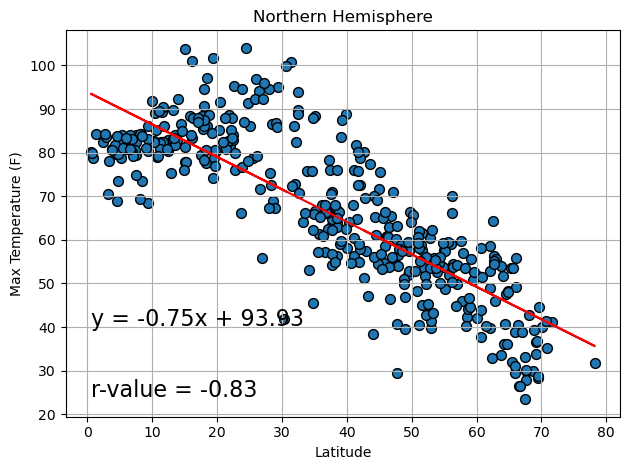

In [16]:
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                              "Northern Hemisphere",
                              "Max Temperature (F)", (0,-200), (0,-220))


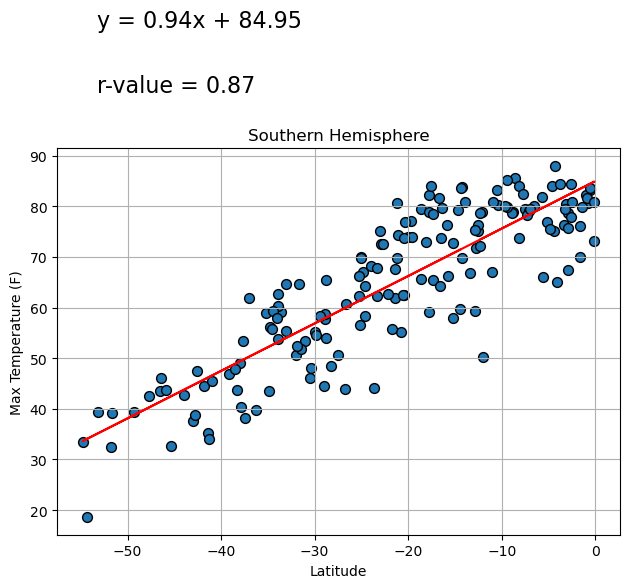

In [31]:
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                              "Southern Hemisphere",
                              "Max Temperature (F)", (10,100),(10,90))

**Discussion about the linear relationship:** I compared the Max Temperature to Latitude. The Northern hemisphere's Max temp increases as the latitude approches the equator. As expected the Northern hemisphere does as well.

### Humidity vs. Latitude Linear Regression Plot

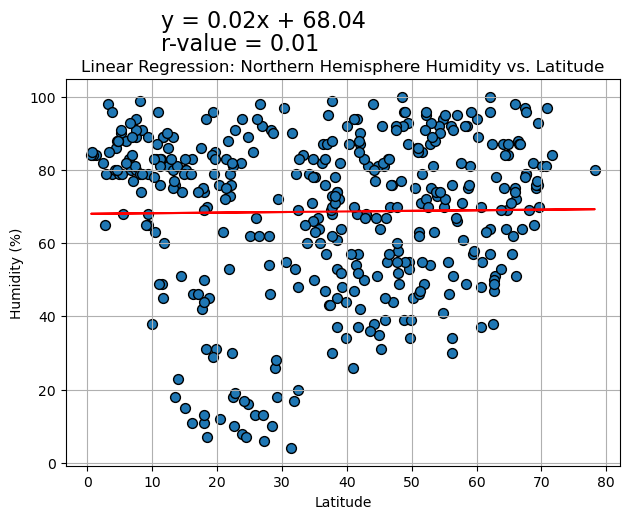

In [21]:
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                              "Linear Regression: Northern Hemisphere Humidity vs. Latitude",
                              "Humidity (%)", equation_position=(50, 50), r_position=(50, 60))

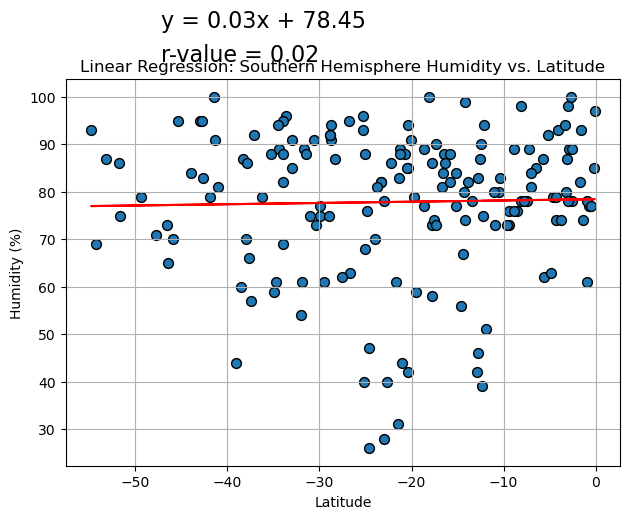

In [30]:
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                              "Linear Regression: Southern Hemisphere Humidity vs. Latitude",
                              "Humidity (%)", equation_position=(50, 50), r_position=(50, 60))

**Discussion about the linear relationship:** When comparing humidity vs latitude, both hemispheres have a pretty flat regression line, showing there isnt much of a relationship between humidity and latitude. I did notice there seem to be more outliers around the -10 to -30 degrees as well as the 10 to 30 degrees for the Northern hemisphere showing more extremes.

### Cloudiness vs. Latitude Linear Regression Plot

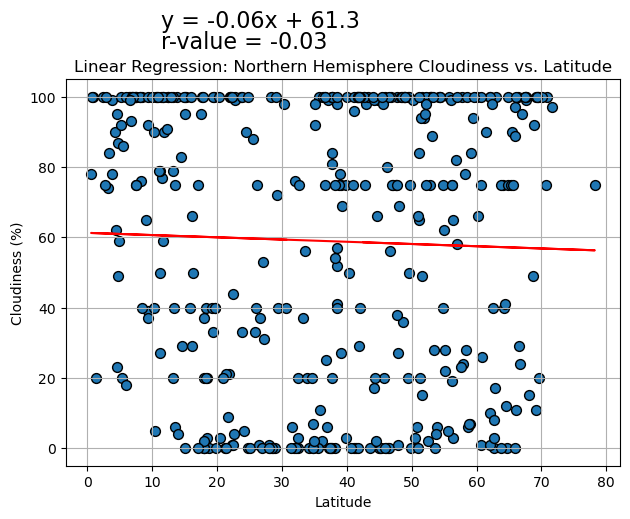

In [29]:
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                              "Linear Regression: Northern Hemisphere Cloudiness vs. Latitude",
                              "Cloudiness (%)", equation_position=(50, 50), r_position=(50, 60))

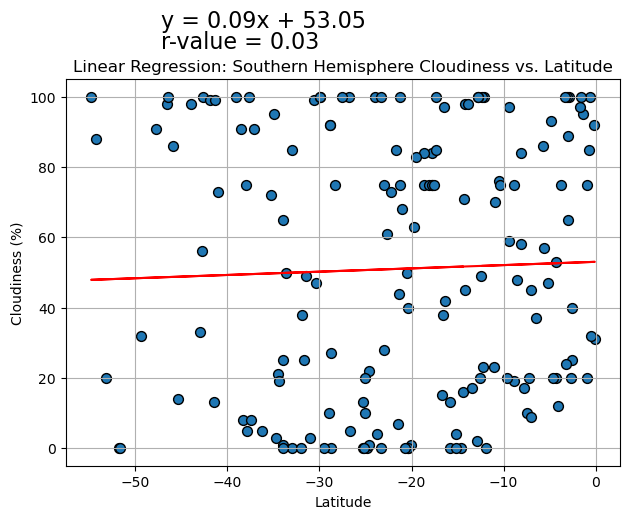

In [27]:
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                              "Linear Regression: Southern Hemisphere Cloudiness vs. Latitude",
                              "Cloudiness (%)", equation_position=(50, 50), r_position=(50, 60))

**Discussion about the linear relationship:** Comparing cloudiness with latitude was interesting because it seems cloudiness data appears trend away from, ironically, the trend line. Most of the data points show either very cloudy or not much clouds at all. Both hemispheres trend lines seem quite flat. Showing latitude doesnt effect cloudiness much at all. Though there is a slight tren of being more cloudy closer to the equator.

### Wind Speed vs. Latitude Linear Regression Plot

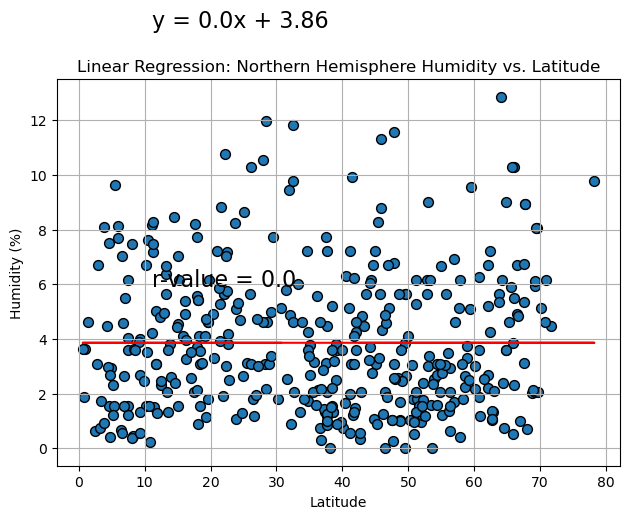

In [26]:
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                              "Linear Regression: Northern Hemisphere Wind Speed vs. Latitude",
                              "Wind Speed", equation_position=(50, 50), r_position=(50, 60))

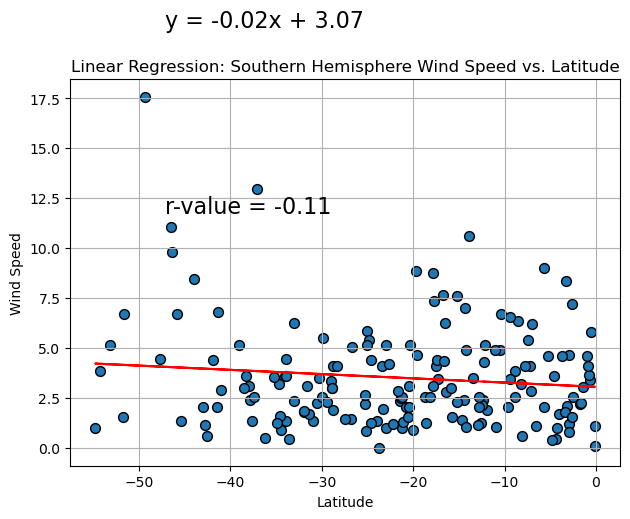

In [28]:
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                              "Linear Regression: Southern Hemisphere Wind Speed vs. Latitude",
                              "Wind Speed", equation_position=(50, 50), r_position=(50, 60))